In [1]:
%pip -q install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from utils.utils import get_mistral_model

model = get_mistral_model()

In [3]:
# # Testing API key - Should work and generate output

# from langgraph.prebuilt import create_react_agent

# def add(a, b):
#   """Adds two numbers"""
#   return a + b

# def multiply(a, b):
#   """Multiplies two numbers"""
#   return a * b

# math_agent = create_react_agent(
#   model=model,
#   tools=[add, multiply],
#   name="math_expert",
#   prompt="You are a math expert. Always use one tool at a time."
# )

# math_agent.invoke(
#   {"messages": [{"role": "user", "content": "What is 3 + 4?"}] 
# })

# Possible Use case 1: Resume and Job matching
Based on the details of a resume and the description of a job, we will try to use agents to determine whether the resume and the job description are a match through a Multi-Agent Supervisor architecture.

A few things to consider:
- Candidate's profile align with company's industry/values
- Candidate's skills align with job's preferred qualifications
- Candidate's projects and experiences align with job's responsibilities

In [4]:
from utils.agents import get_custom_agent

candidate_details = "x"
company = "x"
job_details = "x"

list_of_worker_agents = ["experience", "profile", "skills"]

worker_agents = [
  get_custom_agent(
    model=model,
    agent_type=x,
    candidate_details=candidate_details,
    company=company,
    job_details=job_details
  ) for x in list_of_worker_agents
]

supervisor_agent = get_custom_agent(
  model=model,
  agent_type="supervisor",
  candidate_details=candidate_details,
  company=company,
  job_details=job_details,
  agents=worker_agents
)

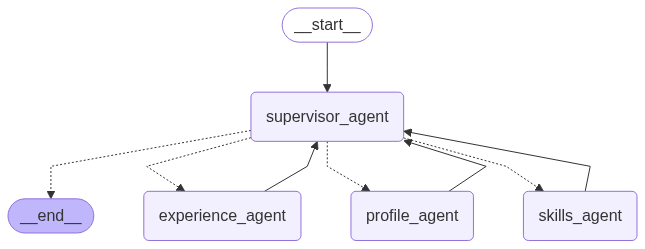

In [5]:
app = supervisor_agent.compile()

app

In [6]:
from utils.utils import parse_docx
import pprint

pprint.pp(parse_docx('data/candidates/OwenTanKengLeng_Resume.docx'))

('OWEN TAN KENG LENG\n'
 'Email: owen.tan@u.nus.edu    Mobile: (+65)92472807\n'
 'Linkedin: www.linkedin.com/in/owentankengleng\tGithub: '
 'https://github.com/OweT1 \n'
 '\n'
 'education\n'
 'National University of Singapore\tAug 2022 - May 2026\n'
 'Bachelor of Science in Data Science and Analytics (Honours) with 2nd Major '
 'in Computer Science \n'
 '2nd Major in Computer Science\n'
 'Grade Point Average: 4.82/5.00 (Expected Honours with Highest Distinction)\n'
 "Attained Dean's List for AY2023/2024 Semester 1 & Semester 2 and Top Student "
 'for Data Structures and Algorithms\n'
 'Relevant Coursework: Data Science in Practice, Machine Learning, Information '
 'Retrieval\n'
 '\n'
 'work experience\n'
 'DBS Bank, Data Science Intern\tMay 2025 - Aug 2025\n'
 '\n'
 'Shopee, Business Analytics Intern\tJan 2025 - Apr 2025\n'
 'Developed a robust scoring system for detection of similar product names '
 'using Natural Language Processing techniques\n'
 'Engineered and optimised complex SQ

In [7]:
# message_history = [
#   {
#     "role": "user",
#     "content": "Run for the following profile"
#   }
# ]

# result = app.invoke({
#   "messages": message_history
# })